<a href="https://colab.research.google.com/github/rafaeldjsm/Data_Science/blob/master/Aprendendo_excel_closure_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testando Importação pro Excel <br>
Listas Hash (Hash Table) <br>
Equação com Sympy <br>
Closure <br>
Github wget <br>


In [1]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
import xlrd
from xlrd import open_workbook
import seaborn as sns
import sympy as sp
from sympy import symbols
from sympy.simplify import simplify
from sympy import integrate

In [2]:
ar = np.array([[rnd.random() for k in range(12)] for j in range(12)])
#ar.describe #AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [3]:
np.random.randn(3,4) # Matriz com distribuição normal

array([[ 0.37816217,  0.29310086,  0.23879109,  0.97337226],
       [-0.87510576,  0.66473926, -0.79595134, -0.90546926],
       [-1.32680471, -0.92341538, -0.00548507,  0.68303662]])

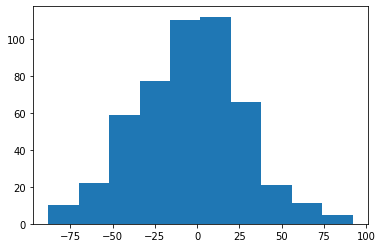

In [4]:
lst = []

for k in range(1000):
    
    rp = rnd.randint(1,100)
    ra = rnd.randint(1,max(2,rp-1)) # Execução

    df = rnd.randint(1,100)
    de = rnd.randint(1,max(2,df-1)) # Execução

    a = rp - ra
    b = df - de
    res = ra-de

    if a > b:
        lst.append(res)

plt.hist(lst);

In [5]:
ar = np.array([1,2,3,7,8])
ar

array([1, 2, 3, 7, 8])

In [6]:
np.isin(4,ar)

array(False)

In [7]:
np.corrcoef(ar)

1.0

In [8]:
#@title Closure

def func1(n):
    def func2(x):
        return x**n
    return func2
ret1 = func1(2)
ret2 = func1(3)
ret3 = func1(4)

In [9]:
ret1,ret2,ret3

(<function __main__.func1.<locals>.func2>,
 <function __main__.func1.<locals>.func2>,
 <function __main__.func1.<locals>.func2>)

In [10]:
ret2(2)

8

In [11]:
BRICS = pd.DataFrame.from_dict({'abv':['BR','RU','CH','IN','AS'],
                   'pais':['Brasil','Russia','China','India','Africa do Sul'],
                   'populacao':[215967714,141927297,1338612968,1180251000,49320500]}).set_index('abv')
BRICS

,pais,populacao
abv,,
BR,Brasil,215967714
RU,Russia,141927297
CH,China,1338612968
IN,India,1180251000
AS,Africa do Sul,49320500


In [12]:
BRICS.loc[["RU","IN"],['populacao']]

,populacao
abv,
RU,141927297
IN,1180251000


In [13]:
BRICS.loc[["RU","IN"],'populacao']

abv
RU     141927297
IN    1180251000
Name: populacao, dtype: int64

In [14]:
wb0 = openpyxl.Workbook()

ws0 = wb0.active
# d = ws0.cell(row=4, column=2, value=10) # Accessing one cell, atribui um valor a celula 4,2 e a d
lo = [''] + [x+str(y) for x,y in zip(["a"]*30,range(30))]

ws0.append(lo)
for k in range(30):
    li = ['b'+str(k)]
    for j in range(30):
        li.append(rnd.random())
    ws0.append(li)

# Save the file
wb0.save("sample0.xlsx")

In [15]:
book = openpyxl.Workbook()
sheet = book.active

rows = (
    (88, 46, 57),
    (89, 38, 12),
    (23, 59, 78),
    (56, 21, 98),
    (24, 18, 43),
    (34, 15, 67)
)

for row in rows:
    sheet.append(row)

book.save('appending.xlsx')

In [16]:
def read_excel(file_input,skipLines):
    filein = xlrd.open_workbook(file_input)
    Output_File_matrix = []
    for sheet in filein.sheets():
        ax_sheet = []
        for line in range(int(skipLines),sheet.nrows):
            ax_line = []
            for col in range(sheet.ncols):
                ax_line.append(str(sheet.cell(line,col).value).replace('"','\\"'))
            ax_sheet.append(ax_line)
        Output_File_matrix.append(ax_sheet)
    return Output_File_matrix

def col_filtering_st(sheet_matrix_st):
    aux_matrix=[]
    for line in range(1,len(sheet_matrix_st)):
        aux_matrix.append([sheet_matrix_st[line][0].split('.')[0],sheet_matrix_st[line][1],sheet_matrix_st[line][2].split('.')[0],sheet_matrix_st[line][3]])
    return aux_matrix

def col_filtering_inv(sheet_matrix_inv):
    aux_matrix=[]
    for line in range(1,len(sheet_matrix_inv)):
        aux_matrix.append([sheet_matrix_inv[line][0],sheet_matrix_inv[line][1].split('.')[0]])
    return aux_matrix

def write_files_st(Output_File_matrix,Output_File_name,output_folder):
    Output_File=open(output_folder+Output_File_name+'_VENTAS.csv','w')
    for line in Output_File_matrix:
        Output_File.write((';'.join(line))+'\n')

def write_files_inv(Output_File_matrix,Output_File_name,output_folder):
    Output_File=open(output_folder+Output_File_name+'_INV.csv','w')
    for line in Output_File_matrix:
        Output_File.write((';'.join(line))+'\n')

In [17]:
# definindo valores para os parametros /content/
input_file_path  = '/content/'
input_file_name  = 'sample0.xlsx'
skip_lines       =  0
output_file_path = '/content/'
output_file_name = 'tes12.csv'
filtered_lin = "b17"

# leitura da planilha e definicao do dataframe
df = pd.read_excel(input_file_path + input_file_name, header = skip_lines, index_col = 0,sheet_name = 'Sheet')

# fatia do datafrome
df_slicing = df.loc[filtered_lin,:].transpose()

# gravacao do dataframe na planilha
df_slicing.to_csv(output_file_path + output_file_name)

In [18]:
# fatia do datafrome
df_slicing = df.loc[filtered_lin,:].transpose()
df_slicing = df_slicing.iloc[:-1]

# gravacao do dataframe na planilha
df_slicing.to_csv(output_file_path + output_file_name,header=False,decimal=',')

In [19]:
df_slicing

a0     0.220228
a1     0.956248
a2     0.829423
a3     0.142864
a4     0.228377
a5     0.406486
a6     0.654366
a7     0.150442
a8     0.059208
a9     0.751369
a10    0.343299
a11    0.969117
a12    0.219115
a13    0.792026
a14    0.661356
a15    0.487685
a16    0.638369
a17    0.196826
a18    0.728449
a19    0.750776
a20    0.559200
a21    0.788665
a22    0.512460
a23    0.159359
a24    0.241011
a25    0.498723
a26    0.823103
a27    0.331325
a28    0.372191
Name: b17, dtype: float64

In [20]:
# definindo valores para os parametros
tab                 = 1

#Extracting the file matrix
file_matrix = np.array(read_excel(input_file_path+input_file_name,skip_lines)[0])

#Extracting last col of sheet from the file matrix ST and indexs
sheet_st = np.transpose([file_matrix[0,:],file_matrix[-1]])

#Writing the File ST
write_files_st(sheet_st,output_file_name,output_file_path)

In [21]:
len(sheet_st[0]), len(sheet_st[1])

(2, 2)

In [22]:
sheet_st

array([['', 'b29'],
       ['a0', '0.3813075956698849'],
       ['a1', '0.3421184254843196'],
       ['a2', '0.7705682288060264'],
       ['a3', '0.1770519135947295'],
       ['a4', '0.072680766416364'],
       ['a5', '0.674847862832378'],
       ['a6', '0.1285224309148211'],
       ['a7', '0.7017837627121831'],
       ['a8', '0.7819834007973931'],
       ['a9', '0.3246792275509758'],
       ['a10', '0.6607642042645574'],
       ['a11', '0.7709728368049142'],
       ['a12', '0.7935980008755739'],
       ['a13', '0.5005749844254579'],
       ['a14', '0.6016832374869219'],
       ['a15', '0.2793742600555653'],
       ['a16', '0.3817666772754017'],
       ['a17', '0.2630417765558906'],
       ['a18', '0.8640949240270851'],
       ['a19', '0.2955938638023575'],
       ['a20', '0.7760214371098587'],
       ['a21', '0.8792891484962583'],
       ['a22', '0.06341957940041298'],
       ['a23', '0.6452024721362032'],
       ['a24', '0.3362574462063525'],
       ['a25', '0.1045949889942736'],
   

In [23]:
input_files = open_workbook('sample0.xlsx')

In [24]:
input_files

In [25]:
workbook = open_workbook('sample0.xlsx') # Escolhe o arquivo a ser lido.

worksheet = workbook.sheet_by_index(0) #Escolha a aba a ser lida. 

for i in range(worksheet.nrows): #itere sobre os itens da aba 
    print(worksheet.row(i))

[empty:'', text:'a0', text:'a1', text:'a2', text:'a3', text:'a4', text:'a5', text:'a6', text:'a7', text:'a8', text:'a9', text:'a10', text:'a11', text:'a12', text:'a13', text:'a14', text:'a15', text:'a16', text:'a17', text:'a18', text:'a19', text:'a20', text:'a21', text:'a22', text:'a23', text:'a24', text:'a25', text:'a26', text:'a27', text:'a28', text:'a29']
[text:'b0', number:0.1149043755470013, number:0.9668351980092332, number:0.9245898412208672, number:0.2060157593563473, number:0.3292738727853537, number:0.1537926799863915, number:0.7964623323448223, number:0.8502941357601443, number:0.2537402460414222, number:0.7622248274322099, number:0.2918363795447172, number:0.454895174028931, number:0.6230605806553358, number:0.2842414506858155, number:0.8709932443205216, number:0.6252333526564986, number:0.5322500884856894, number:0.5147785707264967, number:0.3989679649741562, number:0.4273075277712987, number:0.9310799929417102, number:0.256941570849364, number:0.1662373213119938, number:0

In [26]:
worksheet.col_values(0).index('b17')

18

In [27]:
worksheet.col_values(0)

['',
 'b0',
 'b1',
 'b2',
 'b3',
 'b4',
 'b5',
 'b6',
 'b7',
 'b8',
 'b9',
 'b10',
 'b11',
 'b12',
 'b13',
 'b14',
 'b15',
 'b16',
 'b17',
 'b18',
 'b19',
 'b20',
 'b21',
 'b22',
 'b23',
 'b24',
 'b25',
 'b26',
 'b27',
 'b28',
 'b29']

In [28]:
type(worksheet.col(0)[1])

xlrd.sheet.Cell

In [29]:
worksheet.col(0)

[empty:'',
 text:'b0',
 text:'b1',
 text:'b2',
 text:'b3',
 text:'b4',
 text:'b5',
 text:'b6',
 text:'b7',
 text:'b8',
 text:'b9',
 text:'b10',
 text:'b11',
 text:'b12',
 text:'b13',
 text:'b14',
 text:'b15',
 text:'b16',
 text:'b17',
 text:'b18',
 text:'b19',
 text:'b20',
 text:'b21',
 text:'b22',
 text:'b23',
 text:'b24',
 text:'b25',
 text:'b26',
 text:'b27',
 text:'b28',
 text:'b29']

In [30]:
input_file_path     = '/content'
input_file_name     = '/sample0.xlsx'
output_file_path    = '/content'
output_file_name    = '/test'
tab                 = 0

#opening files
output_file = open(output_file_path + output_file_name+'.csv', "w")
input_files = open_workbook(input_file_path + input_file_name)


#sheet,rows and columns of interest
sheet = input_files.sheet_by_index(tab)
site_id_row = 0
inventory_start_column = 10
    
#iterate over SKUs # Indices da planilha
lsku = worksheet.col_values(0)

#iterate over stores obtaining each inventory and sales values
indices = [i for i, x in enumerate(lsku) if x == "b17"]

for k in indices:
    site_id = sheet.row_values(k)
    print(site_id)
    output_file.write(str(site_id)[1:-1]+'\n')

output_file.close()

['b17', 0.2202284883338299, 0.9562476646831272, 0.829422891715065, 0.1428640679903329, 0.2283766985428659, 0.4064856452130703, 0.6543661808797057, 0.1504417485570901, 0.05920804503032306, 0.7513685869964308, 0.3432993250425572, 0.9691171640994563, 0.2191150172312629, 0.7920255947561023, 0.6613558502383566, 0.4876854048188963, 0.638369498962098, 0.1968262772471878, 0.7284492854986441, 0.7507757988483362, 0.5591995800114682, 0.788665173289994, 0.5124599706341826, 0.1593593578134576, 0.2410111877614897, 0.4987234195868281, 0.8231031862810715, 0.3313250185994718, 0.3721911253181004, 0.2196915709129098]


In [31]:
lsku

['',
 'b0',
 'b1',
 'b2',
 'b3',
 'b4',
 'b5',
 'b6',
 'b7',
 'b8',
 'b9',
 'b10',
 'b11',
 'b12',
 'b13',
 'b14',
 'b15',
 'b16',
 'b17',
 'b18',
 'b19',
 'b20',
 'b21',
 'b22',
 'b23',
 'b24',
 'b25',
 'b26',
 'b27',
 'b28',
 'b29']

In [32]:
sheet.cell

<bound method Sheet.cell of <xlrd.sheet.Sheet object at 0x7fd6b8b38e90>>

In [33]:
sheet.ncols

31

In [34]:
txt = "welcome to the jungle"

x = txt.split()

print(x)

['welcome', 'to', 'the', 'jungle']


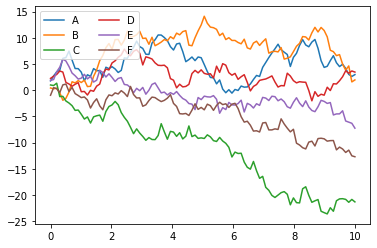

In [35]:
# Create some data
# plt.style.use('classic')
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 100)
y = np.cumsum(rng.randn(100, 6), 0)
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

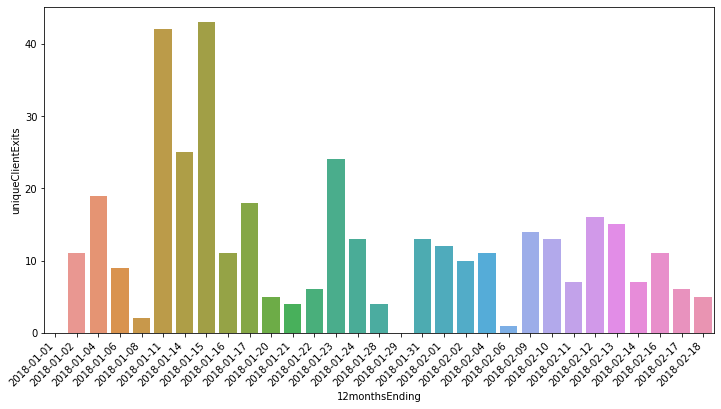

In [36]:
# RANDOM DATA
np.random.seed(62918)
emp = pd.DataFrame({'uniqueClientExits': [np.random.randint(15) for _ in range(50)],
                    '12monthsEnding': pd.to_datetime(
                                          np.random.choice(
                                              pd.date_range('2018-01-01', periods=50), 
                                          50)
                                      )
                   }, columns = ['uniqueClientExits','12monthsEnding'])

# PLOTTING
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = "12monthsEnding", y = "uniqueClientExits", data = emp, 
                  estimator = sum, ci = None, ax=ax)

x_dates = emp['12monthsEnding'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.show()

In [37]:
# data = pd.read_csv('/content/Brasil CDS 5 anos USD - Visão Geralv2.csv')
# x = pd.to_datetime(data.iloc[:,0], format='%d/%m/%y')
x = pd.date_range('2022-01-01', periods=50)
y = 200*np.array(range(len(x))) + 10*np.random.standard_normal(len(x))

data = pd.DataFrame([x,y], index = ['Data','Brasil CDS 5 anos']).T

In [38]:
data['Juros'] = data['Brasil CDS 5 anos'].pct_change()

data['Juros_acu'] =  (1 + data['Juros']).cumprod() - 1  

In [39]:
data

,Data,Brasil CDS 5 anos,Juros,Juros_acu
0,2022-01-01,-7.674061,NaN,NaN
1,2022-01-02,185.093605,-25.119383,-25.119383
2,2022-01-03,385.579132,1.083158,-51.244474
3,2022-01-04,595.5559,0.544575,-78.606359
4,2022-01-05,808.780542,0.358026,-106.391473
5,2022-01-06,1020.612446,0.261915,-133.995100
6,2022-01-07,1205.204902,0.180864,-158.049178
7,2022-01-08,1402.662241,0.163837,-183.779668
8,2022-01-09,1590.547254,0.133949,-208.262797
9,2022-01-10,1789.867292,0.125315,-234.236014


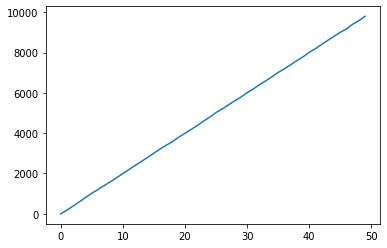

In [40]:
plt.plot(y)

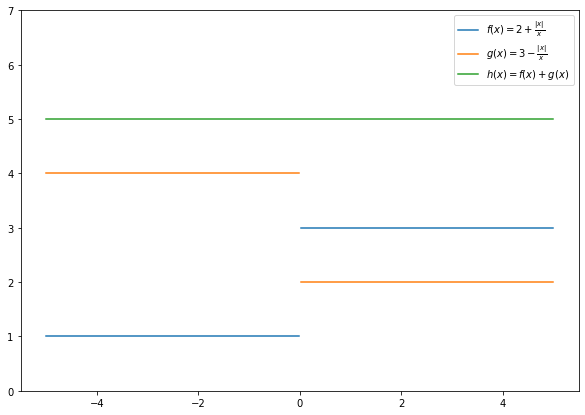

In [41]:
#@title FUNÇÕES DESCONTÍNUAS

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import numpy.ma as ma

def func1(x):
    return 2 + abs(x)/x

func1v = np.vectorize(func1)  

def func2(x):
    return 3 - abs(x)/x


func2v = np.vectorize(func2)  

x = np.arange(-5, 5, 0.01)
f = func1v(x)

g = func2v(x)

h = f + g

f[abs(x) <= 0.01] = np.nan
g[abs(x) <= 0.01] = np.nan

fig, ax = plt.subplots(figsize=(10,7))

plt.plot(x,f,label= r"$f(x) = 2 + \frac{|x|}{x}$")
plt.plot(x,g,label= r"$g(x) = 3 - \frac{|x|}{x}$")
plt.plot(x,h,label= r"$h(x) = f(x)+g(x)$")
plt.legend(loc = 'upper right')
plt.ylim(0, 7)
plt.show()

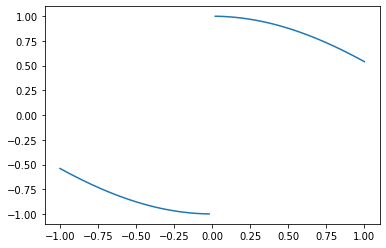

In [42]:
x = np.linspace(-1.0, 1.0, 101) # 101 as then 0 is included
s = np.sign(x)
s[s==0] = np.nan
y = s * np.cos(x)
plt.plot(x, y)

In [43]:
#@title HASHBLE

x = 10
s = 'a'
print(x)
print(id(x))
print(hash(x))

print(id(s))
print(hash(s))

x = 5
s = 'b'
print(x)
print(id(x))
print(hash(x))

print(id(s))
print(hash(s))

10
11256352
10
140560979994288
3662816752486036367
5
11256192
5
140560979819376
-3705144949268779584


In [44]:
wb = openpyxl.Workbook()

ws = wb.active

ws1 = wb.create_sheet("Mysheet")

ws.title = "New Title"

ws.sheet_properties.tabColor = "1072BA"

print(wb.sheetnames)

c = ws['A4']
print(c)


ws['A4'] = 4

# Save the file
wb.save("sample.xlsx")

['New Title', 'Mysheet']
<Cell 'New Title'.A4>


In [45]:
#@title CÁLCULO DO VOLUME DA MOEGA COM SYMPY

f,g,x,a,B,h,l,S = symbols('f,g,x,a,B,h,l,s')

In [46]:
f = B -(B-a)*x/l
g = h - h*x/l
s = ((f+a)/2)*g

In [47]:

simplify(s)

h*(l - x)*(l*(B + a) - x*(B - a))/(2*l**2)

In [48]:
simplify(integrate(s,x))

h*x*(-3*B*l*x + 3*l**2*(B + a) + x**2*(B - a))/(6*l**2)

In [49]:
simplify(integrate(s,(x,0,l)))

h*l*(B + 2*a)/6

In [50]:
# bskr.py

def deltaq2(a,b,c):
    return b**2-4*a*c


def rseq2(a,b,c):
    dt = deltaq2(a,b,c)
    if dt == 0:
        return (-b/(2*a))
    elif dt > 0:
        return ((-b+dt)/(2*a), (-b-dt)/(2*a))
    else:
        return 'Equação sem raizes reais, delta negativo'

In [51]:
!wget https://raw.githubusercontent.com/rafaeldjsm/Data_Science/master/Exercicios_basicos/bskr.py

--2022-07-04 20:49:29--  https://raw.githubusercontent.com/rafaeldjsm/Data_Science/master/Exercicios_basicos/bskr.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272 [text/plain]
Saving to: ‘bskr.py.1’

bskr.py.1           100%[===================>]     272  --.-KB/s    in 0s      

2022-07-04 20:49:29 (12.4 MB/s) - ‘bskr.py.1’ saved [272/272]



In [52]:
import bskr
from bskr import deltaq2
from bskr import rseq2

In [53]:
rseq2(1,-5,6)

(3.0, 2.0)

In [54]:
deltaq2(1,-5,6)

1

In [55]:
l1 = [1,'b',2,7]
l2 = ['e','r',6,9]

In [56]:
list.append(l1,l2)

In [57]:
l1

[1, 'b', 2, 7, ['e', 'r', 6, 9]]

In [58]:
rseq2(1,1,1)

'Equação sem razizes reais, delta negativo'